In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import re

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [ ]:
def reduce_memory_usage(df:pd.DataFrame) -> pd.DataFrame:
        numerics = ['int8', 'int16', 'int32', 'int64', 'float8','float16', 'float32', 'float64']
        start_mem = df.memory_usage().sum() / 1024**2
        for col in tqdm(df.columns):
            col_type = df[col].dtypes
            if col_type in numerics:
                c_min = df[col].min()
                c_max = df[col].max()
                if str(col_type)[:3] == 'int':
                    if (c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max) or (c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max):
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if (c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max) or (c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max):
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)
        end_mem = df.memory_usage().sum() / 1024**2
        print(f'Mem. usage decreased to {end_mem:5.2f} Mb ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)')
        return df

In [ ]:
demo_train_df = reduce_memory_usage(pd.read_csv('traindemographics.csv'))
#demo_train_df=pd.read_csv('traindemographics.csv')
prev_train_df = reduce_memory_usage(pd.read_csv('trainprevloans.csv',
                                               parse_dates = ["approveddate", "creationdate", "closeddate", "firstduedate", "firstrepaiddate"]))
#prev_train_df=  pd.read_csv('trainprevloans.csv')
#perf_train_df=pd.read_csv('trainperf.csv')
perf_train_df = reduce_memory_usage(pd.read_csv(os.path.join('trainperf.csv'),
                                             parse_dates = ["approveddate", "creationdate"]))

100%|██████████| 9/9 [00:00<00:00, 2379.97it/s]


Mem. usage decreased to  0.27 Mb (11.1% reduction)


100%|██████████| 12/12 [00:00<00:00, 414.30it/s]


Mem. usage decreased to  1.25 Mb (25.0% reduction)


100%|██████████| 10/10 [00:00<00:00, 361.56it/s]

Mem. usage decreased to  0.23 Mb (30.0% reduction)


In [ ]:
# check for duplicates in demographic dataset..
print(f"No. of Duplicate Records: {demo_train_df.duplicated(subset = ['customerid'], keep = 'last').sum()}")

No. of Duplicate Records: 12


In [ ]:
# get the duplicated records in the demographic dataset, while keeping the last records....
demo_train_df[demo_train_df.duplicated(subset = ['customerid'], keep = 'last') == True]

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
138,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.211090,GT Bank,NaN,Permanent,NaN
272,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782562,7.171356,First Bank,NaN,Permanent,Secondary
445,8a858e6c5c88d145015c8b9627cd5a48,1979-09-30 00:00:00.000000,Savings,3.367008,6.497313,Sterling Bank,NaN,Permanent,NaN
750,8a858f965bb63a25015bbf63fd062e2e,1974-02-25 00:00:00.000000,Savings,3.936366,6.817957,Stanbic IBTC,NaN,Permanent,NaN
798,8a858fc75cd62882015cdaf2f4311b3f,1975-10-27 00:00:00.000000,Savings,7.437607,9.088935,GT Bank,NaN,Permanent,NaN
1010,8a858fe65675195a015679452588279c,1982-08-01 00:00:00.000000,Savings,7.533646,9.046885,UBA,NaN,Permanent,NaN
1338,8a858fe05d421ff4015d4c87d2a21ceb,1983-01-20 00:00:00.000000,Savings,8.526960,12.023015,Skye Bank,NaN,Permanent,NaN
1414,8a858e625c8d993a015c938f829f77ee,1988-12-20 00:00:00.000000,Savings,5.768333,5.561992,First Bank,NaN,Permanent,NaN
1520,8a858ec65cc6352b015cc64525ea0763,1985-01-30 00:00:00.000000,Savings,3.845728,7.411736,GT Bank,NaN,Permanent,NaN
3021,8a858f1e5baffcc9015bb02b505f180d,1983-04-06 00:00:00.000000,Savings,6.969350,4.818534,GT Bank,NaN,Permanent,NaN


In [ ]:
# take one of the customer ids to check the data...
# full row duplicate..
# let's remove the duplicated values....
demo_train_df[demo_train_df["customerid"] == "8a858fca5c35df2c015c39ad8695343e"]

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
138,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.21109,GT Bank,NaN,Permanent,NaN
159,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.21109,GT Bank,NaN,Permanent,NaN


In [ ]:
# remove duplicated rows..
demo_train_df.drop_duplicates(subset = ['customerid'], keep = 'last', inplace = True)

In [ ]:
# check duplicate rows in previous performance dataset..
# check for duplicate customer ids...
print(f"No. of Duplicate Records: {prev_train_df.duplicated(subset = ['customerid'], keep = 'last').sum()}")

No. of Duplicate Records: 13824


In [ ]:
# check for full row duplicate...
# no full row duplicates....
print(f"No. of Duplicate Records: {prev_train_df.duplicated(subset = ['customerid', 'systemloanid'], keep = 'last').sum()}")

No. of Duplicate Records: 0


In [ ]:
# This means there are customers that have more than 1 record in historical performance data....
# 13824 out of 18183 are duplicates...
prev_train_df[prev_train_df.duplicated(subset = ['customerid'], keep = 'last')].head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24,2017-04-24 00:48:43
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03,2017-07-14 21:08:35


In [ ]:
# check one customers..
## 8a2a81a74ce8c05d014cfb32a0da1049
prev_train_df[prev_train_df['customerid'] == '8a2a81a74ce8c05d014cfb32a0da1049'].sort_values(by = "loannumber")

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
1742,8a2a81a74ce8c05d014cfb32a0da1049,301675247,1,2016-08-09 22:57:01,2016-08-09 21:56:47,10000.0,13000.0,30,2016-08-15 08:49:18,NaN,2016-09-08,2016-08-15 08:34:14
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43
1743,8a2a81a74ce8c05d014cfb32a0da1049,301705521,3,2016-09-05 08:45:24,2016-09-05 07:45:16,20000.0,24500.0,30,2016-10-04 18:02:58,NaN,2016-10-05,2016-10-04 17:47:49
1141,8a2a81a74ce8c05d014cfb32a0da1049,301739329,4,2016-10-07 19:00:48,2016-10-07 18:00:37,20000.0,24500.0,30,2016-11-07 08:29:43,NaN,2016-11-07,2016-11-07 08:14:34
1744,8a2a81a74ce8c05d014cfb32a0da1049,301755438,5,2016-11-07 09:31:42,2016-11-07 08:31:32,30000.0,34500.0,30,2016-12-21 11:50:48,NaN,2016-12-07,2016-12-21 11:35:37
57,8a2a81a74ce8c05d014cfb32a0da1049,301777989,6,2016-12-21 19:03:40,2016-12-21 11:02:54,20000.0,23800.0,30,2017-02-28 13:20:29,NaN,2017-01-20,2017-02-28 13:05:11
1142,8a2a81a74ce8c05d014cfb32a0da1049,301828139,7,2017-02-28 13:25:25,2017-02-28 12:25:18,20000.0,23800.0,30,2017-03-01 18:25:25,NaN,2017-03-30,2017-03-01 18:10:14
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00
55,8a2a81a74ce8c05d014cfb32a0da1049,301923941,10,2017-06-01 13:34:30,2017-06-01 12:34:21,20000.0,24500.0,30,2017-06-25 15:24:06,NaN,2017-07-03,2017-06-25 15:13:56


In [ ]:
# check term days that are greater than 60.........
prev_train_df[prev_train_df['termdays'] > 60].head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
567,8a8589c1545181f3015466b5659a4299,301863120,9,2017-04-10 16:57:10,2017-04-10 15:57:03,50000.0,57500.0,90,2017-05-31 19:26:20,NaN,2017-05-10,2017-05-10 00:48:29
762,8a85896653f0fed20154047ec0720b35,301895344,11,2017-05-08 12:00:32,2017-05-08 11:00:24,50000.0,57500.0,90,2017-06-08 09:59:35,NaN,2017-06-07,2017-06-08 09:49:26
950,8a858f7d5578012a01557ea194d94948,301840987,22,2017-03-18 10:29:08,2017-03-18 09:28:59,50000.0,57500.0,90,2017-06-05 09:56:43,NaN,2017-04-17,2017-04-07 15:27:45
1310,8a858e6f5668e01701568f65c3b52b07,301939770,11,2017-06-15 13:57:12,2017-06-15 12:56:04,50000.0,57500.0,90,2017-07-18 14:28:03,NaN,2017-07-17,2017-07-17 19:05:02
1342,8a858fd3552c756201553571d2fe62e3,301904753,10,2017-05-13 11:05:07,2017-05-13 10:05:00,50000.0,57500.0,90,2017-07-12 11:51:20,NaN,2017-06-12,2017-06-10 12:43:04


In [ ]:
# adding features to previous performance dataset..
# additional fees...
prev_train_df["fees"] = prev_train_df["totaldue"] - prev_train_df["loanamount"]
# number of days between loan approval date and closed date to see the difference between it and termdays and if it exceeds termdays...
prev_train_df["process_time"] = (prev_train_df['closeddate'] - prev_train_df['approveddate']).dt.days
prev_train_df["exceeds_termdays"] = prev_train_df.apply(lambda row: 1 if  row["process_time"] > row["termdays"] else 0, axis = 1)
prev_train_df["termdays_actual_diff"] = prev_train_df['termdays'] - prev_train_df['process_time']
# firstduedate: first planned payment date...
# firstrepaiddate : first actual payment date....
# number of days between planned and actual dates may be an indicator..
prev_train_df["after_planned"] = prev_train_df.apply(lambda row: 1 if  row["firstrepaiddate"] > row["firstduedate"] else 0, axis = 1)
prev_train_df["planned_actual_diff"] = (prev_train_df['firstduedate'] - prev_train_df['firstrepaiddate']).dt.days
# difference between creation and approval date..
prev_train_df["approval_creation_diff"] = (prev_train_df['approveddate'] - prev_train_df['creationdate']).dt.seconds / 60.0**2

In [ ]:
prev_train_df[prev_train_df['customerid'] == '8a1a1e7e4f707f8b014f797718316cad']

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,fees,process_time,exceeds_termdays,termdays_actual_diff,after_planned,planned_actual_diff,approval_creation_diff
5216,8a1a1e7e4f707f8b014f797718316cad,301620412,1,2016-05-13 15:29:37,2016-05-13 14:29:31,10000.0,13000.0,30,2016-06-15 00:03:33,NaN,2016-06-13,2016-06-14 10:41:13,3000.0,32,1,-2,1,-2,1.001667
7999,8a1a1e7e4f707f8b014f797718316cad,301916386,3,2017-05-23 14:21:42,2017-05-23 13:20:30,20000.0,24500.0,30,2017-06-21 21:58:00,NaN,2017-06-22,2017-06-21 21:47:51,4500.0,29,0,1,0,0,1.020000
16602,8a1a1e7e4f707f8b014f797718316cad,301947045,4,2017-06-21 22:09:51,2017-06-21 21:09:44,30000.0,39000.0,60,2017-07-26 19:48:11,NaN,2017-07-21,2017-07-20 15:05:33,9000.0,34,0,26,0,0,1.001944
17546,8a1a1e7e4f707f8b014f797718316cad,301632940,2,2016-06-15 11:22:38,2016-06-15 10:22:32,10000.0,13000.0,30,2016-07-15 13:59:02,NaN,2016-07-15,2016-07-15 13:43:58,3000.0,30,0,0,1,-1,1.001667


In [ ]:
# Now we need to aggregate the previous performance dataset to make it efficient for us when joining the datasets..
# number of previous loans...
agg_prev_train_df = pd.DataFrame(
    prev_train_df.groupby("customerid", as_index = False).agg({
        'systemloanid':'count',
        'termdays': ['mean', 'min', 'max'],
        'loanamount': ['mean', 'min', 'max'],
        'fees': ['mean', 'min', 'max'],
        'exceeds_termdays': 'sum',
        'termdays_actual_diff': 'mean',
        'after_planned': 'sum',
        'planned_actual_diff': 'mean',
        'approval_creation_diff': 'mean'
    })
)
agg_prev_train_df.columns = ["customerid", "loan_cnt", "termdays_mean", "termdays_min", "termdays_max",
                             "loan_amt_mean", "loan_amt_min", "loan_amt_max", "fees_mean", "fees_min", "fees_max",
                            "exceeds_termdays_sum", "avg_termdays_actual_diff", "after_planned_sum", "avg_planned_actual_diff",
                            "avg_approval_creation_diff"]
agg_prev_train_df.head()

,customerid,loan_cnt,termdays_mean,termdays_min,termdays_max,loan_amt_mean,loan_amt_min,loan_amt_max,fees_mean,fees_min,fees_max,exceeds_termdays_sum,avg_termdays_actual_diff,after_planned_sum,avg_planned_actual_diff,avg_approval_creation_diff
0,8a1088a0484472eb01484669e3ce4e0b,1,15.000000,15,15,10000.000000,10000.0,10000.0,1500.000000,1500.0,1500.0,1,-7.00,1,-7.000000,1.018889
1,8a1a1e7e4f707f8b014f797718316cad,4,37.500000,30,60,17500.000000,10000.0,30000.0,4875.000000,3000.0,9000.0,1,6.25,2,-0.750000,1.006319
2,8a1a32fc49b632520149c3b8fdf85139,7,19.285714,15,30,12857.142578,10000.0,20000.0,2357.142822,1500.0,4500.0,1,1.00,4,-0.571429,1.005159
3,8a1eb5ba49a682300149c3c068b806c7,8,33.750000,30,60,16250.000000,10000.0,30000.0,4050.000000,3000.0,9000.0,0,5.25,2,2.125000,1.004583
4,8a1edbf14734127f0147356fdb1b1eb2,2,22.500000,15,30,10000.000000,10000.0,10000.0,2250.000000,1500.0,3000.0,0,4.50,1,3.000000,1.010417


In [ ]:
agg_prev_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4359 non-null   object 
 1   loan_cnt                    4359 non-null   int64  
 2   termdays_mean               4359 non-null   float64
 3   termdays_min                4359 non-null   int16  
 4   termdays_max                4359 non-null   int16  
 5   loan_amt_mean               4359 non-null   float32
 6   loan_amt_min                4359 non-null   float32
 7   loan_amt_max                4359 non-null   float32
 8   fees_mean                   4359 non-null   float32
 9   fees_min                    4359 non-null   float32
 10  fees_max                    4359 non-null   float32
 11  exceeds_termdays_sum        4359 non-null   int64  
 12  avg_termdays_actual_diff    4359 non-null   float64
 13  after_planned_sum           4359 

In [ ]:
# no duplicate rows in performance dataset, perfect !!!!!!!
print(f"No. of Duplicate Records: {perf_train_df.duplicated(subset = ['customerid'], keep = 'last').sum()}")

No. of Duplicate Records: 0


In [ ]:
# to start working on the dataset and analyze them effectively
# let's join them together..
# left join demographics and previous performance datasets on performance dataset..
final_train_df = perf_train_df.merge(agg_prev_train_df,
                                    on = "customerid",
                                    how = "left",
                                    suffixes=('_perf', '_prev'))
final_train_df = final_train_df.merge(demo_train_df,
                                      on = "customerid",
                                      how = "left",
                                      suffixes=('', '_demo'))
final_train_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,loan_cnt,termdays_mean,termdays_min,termdays_max,loan_amt_mean,loan_amt_min,loan_amt_max,fees_mean,fees_min,fees_max,exceeds_termdays_sum,avg_termdays_actual_diff,after_planned_sum,avg_planned_actual_diff,avg_approval_creation_diff,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,11.0,30.0,30.0,30.0,18181.818359,10000.0,30000.0,3900.0,3000.0,4500.0,3.0,0.545455,4.0,0.000000,1.639949,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,6.0,17.5,15.0,30.0,10000.000000,10000.0,10000.0,1750.0,1500.0,3000.0,1.0,-0.666667,3.0,-1.833333,1.002824,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,2.0,22.5,15.0,30.0,10000.000000,10000.0,10000.0,2250.0,1500.0,3000.0,2.0,-9.000000,2.0,-8.500000,1.001944,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,8.0,37.5,30.0,60.0,18750.000000,10000.0,30000.0,4800.0,3000.0,9000.0,0.0,10.500000,0.0,2.125000,1.002847,1986-09-07 00:00:00.000000,Other,7.457913,9.076573,GT Bank,NaN,Permanent,Primary


In [ ]:
# check for full-row duplicates..
print(f"No. of Full row duplicate records: {final_train_df.duplicated().sum()}")

No. of Full row duplicate records: 0


In [ ]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4368 entries, 0 to 4367
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4368 non-null   object        
 1   systemloanid                4368 non-null   int32         
 2   loannumber                  4368 non-null   int16         
 3   approveddate                4368 non-null   datetime64[ns]
 4   creationdate                4368 non-null   datetime64[ns]
 5   loanamount                  4368 non-null   float32       
 6   totaldue                    4368 non-null   float32       
 7   termdays                    4368 non-null   int16         
 8   referredby                  587 non-null    object        
 9   good_bad_flag               4368 non-null   object        
 10  loan_cnt                    4359 non-null   float64       
 11  termdays_mean               4359 non-null   float64     

In [ ]:
# doesn't exist in aggreated dataset!!!!!!!!!
agg_prev_train_df[agg_prev_train_df["customerid"] == "8a85886e54beabf90154c0a29ae757c0"]

,customerid,loan_cnt,termdays_mean,termdays_min,termdays_max,loan_amt_mean,loan_amt_min,loan_amt_max,fees_mean,fees_min,fees_max,exceeds_termdays_sum,avg_termdays_actual_diff,after_planned_sum,avg_planned_actual_diff,avg_approval_creation_diff


In [ ]:
# also doesn't exist in historical performance dataset.....
prev_train_df[prev_train_df["customerid"] == "8a85886e54beabf90154c0a29ae757c0"]

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,fees,process_time,exceeds_termdays,termdays_actual_diff,after_planned,planned_actual_diff,approval_creation_diff


In [ ]:
# check percentage of missing values in columns...
(final_train_df.isnull().sum() / final_train_df.shape[0]).sort_values(ascending = False)

bank_branch_clients           0.992445
level_of_education_clients    0.898581
referredby                    0.865614
employment_status_clients     0.364469
bank_name_clients             0.251603
latitude_gps                  0.251603
longitude_gps                 0.251603
bank_account_type             0.251603
birthdate                     0.251603
fees_mean                     0.002060
avg_approval_creation_diff    0.002060
avg_planned_actual_diff       0.002060
after_planned_sum             0.002060
avg_termdays_actual_diff      0.002060
exceeds_termdays_sum          0.002060
fees_max                      0.002060
fees_min                      0.002060
loan_amt_max                  0.002060
loan_amt_min                  0.002060
loan_amt_mean                 0.002060
termdays_max                  0.002060
termdays_min                  0.002060
termdays_mean                 0.002060
loan_cnt                      0.002060
systemloanid                  0.000000
good_bad_flag            

In [ ]:
final_train_df["level_of_education_clients"].value_counts(normalize = True, dropna = False)

NaN              0.898581
Graduate         0.073489
Secondary        0.014881
Post-Graduate    0.011447
Primary          0.001603
Name: level_of_education_clients, dtype: float64

In [ ]:
final_train_df["employment_status_clients"].value_counts(normalize = True, dropna = False)

Permanent        0.535714
NaN              0.364469
Self-Employed    0.063416
Student          0.025412
Unemployed       0.009844
Retired          0.000916
Contract         0.000229
Name: employment_status_clients, dtype: float64

In [ ]:
final_train_df["bank_name_clients"].value_counts(normalize = True, dropna = False)

GT Bank               0.276328
NaN                   0.251603
First Bank            0.098443
Access Bank           0.075092
UBA                   0.061126
Zenith Bank           0.051282
Diamond Bank          0.049451
Stanbic IBTC          0.026786
EcoBank               0.026557
FCMB                  0.020375
Skye Bank             0.017170
Fidelity Bank         0.016941
Sterling Bank         0.009615
Wema Bank             0.004350
Heritage Bank         0.004121
Union Bank            0.003434
Keystone Bank         0.003205
Standard Chartered    0.002976
Unity Bank            0.001145
Name: bank_name_clients, dtype: float64

In [ ]:
final_train_df["bank_account_type"].value_counts(normalize = True, dropna = False)

Savings    0.588370
NaN        0.251603
Other      0.149496
Current    0.010531
Name: bank_account_type, dtype: float64

In [ ]:
# data cleaning steps...
## 1- referredby_perf, referredby_prev if missing then customers aren't referred, replace missing by no-referral
## 2- 99.4% of 'bank_branch_clients' values are missing then we can remove it safely..
## 3- replace missing values in level_of_education_clients by no-info
## 4- replace missing values in employment_status_clients by no-info
final_train_df.drop("bank_branch_clients", axis = 1, inplace = True)

In [ ]:
final_train_df["approval_creation_diff"] = (final_train_df['approveddate'] - final_train_df['creationdate']).dt.seconds / 60.0**2
final_train_df.drop(['approveddate', 'creationdate'], axis = 1, inplace = True)

In [ ]:
final_train_df.to_csv("final_train.csv", index = False)

In [ ]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4368 entries, 0 to 4367
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4368 non-null   object 
 1   systemloanid                4368 non-null   int32  
 2   loannumber                  4368 non-null   int16  
 3   loanamount                  4368 non-null   float32
 4   totaldue                    4368 non-null   float32
 5   termdays                    4368 non-null   int16  
 6   referredby                  587 non-null    object 
 7   good_bad_flag               4368 non-null   object 
 8   loan_cnt                    4359 non-null   float64
 9   termdays_mean               4359 non-null   float64
 10  termdays_min                4359 non-null   float64
 11  termdays_max                4359 non-null   float64
 12  loan_amt_mean               4359 non-null   float32
 13  loan_amt_min                4359 

In [ ]:
# final_train_df["good_bad_flag"] = final_train_df["good_bad_flag"].map({"Good": 1, "Bad":0})

In [ ]:
from sklearn.model_selection import train_test_split
X=final_train_df.drop(columns=['good_bad_flag','birthdate','customerid', 'systemloanid'])
y=final_train_df['good_bad_flag']
#X["referredby"] = X["referredby"].fillna("no")
X["referredby"] = X["referredby"].apply(lambda value: 'yes' if pd.notnull(value) else 'No')
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,loannumber,loanamount,totaldue,termdays,referredby,loan_cnt,termdays_mean,termdays_min,termdays_max,loan_amt_mean,loan_amt_min,loan_amt_max,fees_mean,fees_min,fees_max,exceeds_termdays_sum,avg_termdays_actual_diff,after_planned_sum,avg_planned_actual_diff,avg_approval_creation_diff,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,approval_creation_diff
2406,3,10000.0,12500.0,30,No,2.0,30.00,30.0,30.0,10000.0,10000.0,10000.0,3000.000000,3000.0,3000.0,1.0,1.00,1.0,0.000000,1.002500,Savings,3.315758,6.660929,GT Bank,Permanent,NaN,1.002500
809,10,40000.0,44000.0,30,No,9.0,30.00,15.0,60.0,20000.0,10000.0,30000.0,3688.888916,1500.0,6800.0,2.0,5.00,4.0,0.555556,1.004136,Savings,3.389551,7.141895,Wema Bank,Permanent,NaN,1.003889
1666,3,10000.0,13000.0,30,No,2.0,30.00,30.0,30.0,10000.0,10000.0,10000.0,3000.000000,3000.0,3000.0,0.0,15.50,0.0,14.500000,1.003889,Savings,5.241548,7.254238,First Bank,Permanent,NaN,1.001389
2680,5,20000.0,24500.0,30,No,4.0,26.25,15.0,30.0,10000.0,10000.0,10000.0,2625.000000,1500.0,3000.0,3.0,-1.25,3.0,-1.250000,1.003194,Other,3.610541,6.506646,Access Bank,Student,NaN,1.001667
682,5,10000.0,12250.0,30,No,4.0,22.50,15.0,30.0,10000.0,10000.0,10000.0,2250.000000,1500.0,3000.0,1.0,1.25,3.0,0.250000,1.003472,Other,5.707444,5.884950,FCMB,Self-Employed,Graduate,1.001389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,2,10000.0,11500.0,15,yes,1.0,15.00,15.0,15.0,10000.0,10000.0,10000.0,1500.000000,1500.0,1500.0,0.0,1.00,0.0,0.000000,1.019722,Savings,3.282552,6.694627,GT Bank,Permanent,NaN,1.002500
466,9,30000.0,34500.0,30,No,8.0,15.00,15.0,15.0,15000.0,10000.0,20000.0,1787.500000,1500.0,2250.0,1.0,4.00,3.0,2.875000,1.001910,NaN,NaN,NaN,NaN,NaN,NaN,1.004167
3092,2,10000.0,13000.0,30,yes,1.0,15.00,15.0,15.0,10000.0,10000.0,10000.0,1500.000000,1500.0,1500.0,0.0,4.00,0.0,2.000000,1.001944,Savings,7.484537,10.449147,Stanbic IBTC,Permanent,NaN,1.002222
3772,3,20000.0,22250.0,15,No,2.0,15.00,15.0,15.0,15000.0,10000.0,20000.0,1875.000000,1500.0,2250.0,0.0,2.00,0.0,0.500000,1.010278,Savings,3.390201,7.173957,GT Bank,Permanent,NaN,1.001667


In [ ]:
X_test['referredby'].unique()

array(['No', 'yes'], dtype=object)

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# get the categorical and numeric column names
num_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# pipeline for numerical columns
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

# pipeline for categorical columns
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),  # Impute missing values with most frequent value
    OrdinalEncoder()
)

# combine both the pipelines
full_pipe = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
], remainder = "passthrough", n_jobs = -1)
# change the model
# build the model
logreg = make_pipeline(
    full_pipe,
    LogisticRegression(max_iter=1000, random_state=42)
)



In [ ]:
# train the model
logreg.fit(X_train, y_train)

# make predictions on the test set
y_pred = logreg.predict(X_test)

# measure accuracy
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)


Accuracy Score: 0.7643020594965675


In [ ]:
import pickle

# Save the model
with open('logreg.pkl', 'wb') as f:
    pickle.dump(logreg, f)


In [ ]:
y_train = y_train.map({'Bad': 0, 'Good': 1})
y_test = y_test.map({'Bad': 0, 'Good': 1})

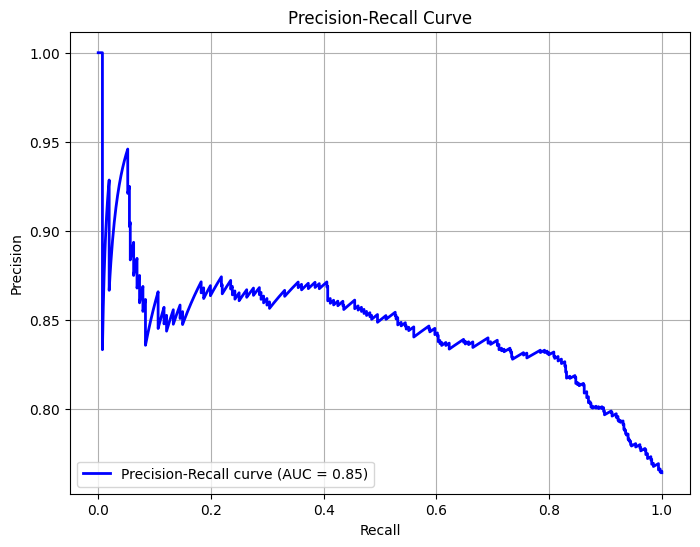

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc

# Generate some example data
#X, y = make_classification(n_samples=1000, n_features=27, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a binary classification model
#model = LogisticRegression()
#model.fit(X_train, y_train)
logreg.fit(X_train, y_train)
# Get predicted probabilities for positive class
y_scores = logreg.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Calculate area under the precision-recall curve
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = make_pipeline(
    full_pipe, RandomForestClassifier(n_estimators=100, random_state=42))
# train the model
rf_classifier.fit(X_train, y_train)

# make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# measure accuracy
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)

Accuracy Score: 0.7608695652173914


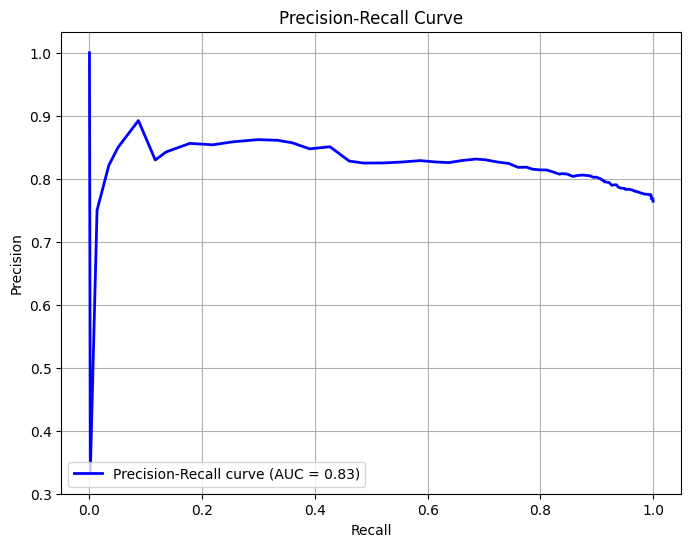

In [ ]:
y_scores = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Calculate area under the precision-recall curve
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = make_pipeline(
    full_pipe, XGBClassifier(n_estimators=100, random_state=42))
#train the model
xgb_classifier.fit(X_train, y_train)

# make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# measure accuracy
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)

Accuracy Score: 0.7528604118993135


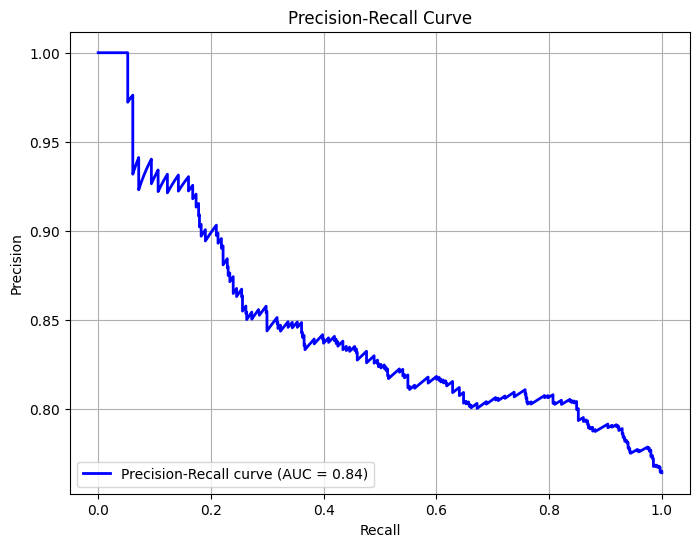

In [ ]:
y_scores = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Calculate area under the precision-recall curve
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker
    r = call_item()
  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 589, in __call__
    return [func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 589, in <listcomp>
    return [func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 123, in __call__
    return self.function(*args, **kwargs)
  File 

Cross-Validation Scores: [0.7925608  0.79828326 0.79971388        nan 0.7965616 ]
Mean CV Score: nan


Feature: num__avg_planned_actual_diff, MI Score: 0.05159850027027746
Feature: num__avg_termdays_actual_diff, MI Score: 0.04224252652145033
Feature: num__totaldue, MI Score: 0.025142630890845563
Feature: num__after_planned_sum, MI Score: 0.019684536447826417
Feature: num__loanamount, MI Score: 0.019625918597354408
Feature: num__approval_creation_diff, MI Score: 0.016264639358522626
Feature: num__fees_max, MI Score: 0.016189714653833676
Feature: num__loan_amt_mean, MI Score: 0.01579390224000332
Feature: num__loannumber, MI Score: 0.01206358822065079
Feature: num__fees_mean, MI Score: 0.010235569544747358
Feature: num__loan_cnt, MI Score: 0.010155861738927463
Feature: num__loan_amt_max, MI Score: 0.00979863609063547
Feature: cat__bank_account_type, MI Score: 0.004503152856810688
Feature: num__termdays_max, MI Score: 0.0034342741800750254
Feature: num__termdays, MI Score: 0.0030444414941432907
Feature: num__termdays_min, MI Score: 0.0026305204688599204
Feature: num__exceeds_termdays_sum, M

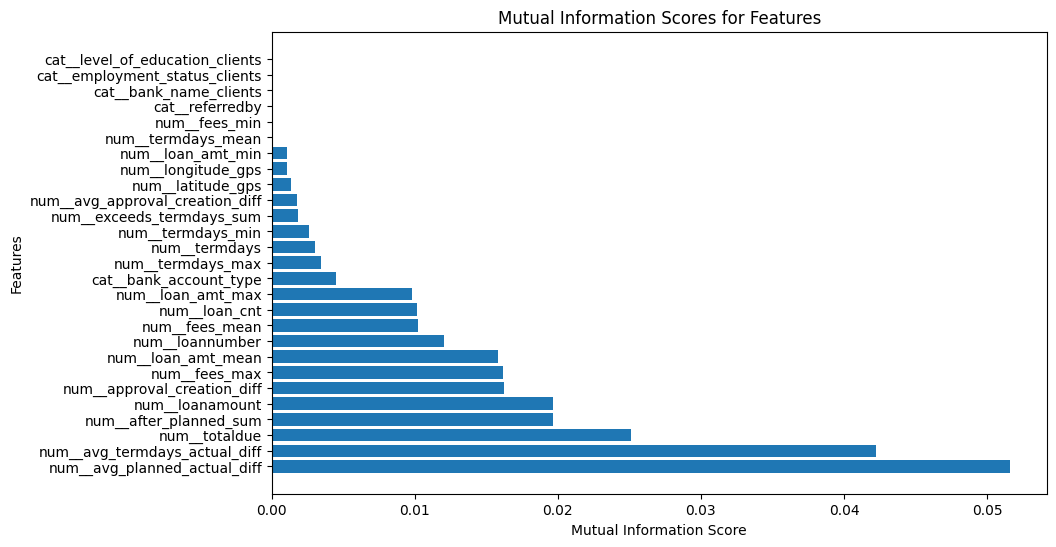

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Transform the data using the preprocessing pipeline
x_transformed = full_pipe.transform(X_train)

# Calculate mutual information scores for transformed data
mi_scores = mutual_info_classif(x_transformed, y_train, random_state=42)

# Associate feature names with their scores
mi_feature_scores = dict(zip(full_pipe.get_feature_names_out(), mi_scores))

# Sort features by MI score
sorted_features = sorted(mi_feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print or visualize the feature scores
for feature, score in sorted_features:
    print(f"Feature: {feature}, MI Score: {score}")

# Plot the mutual information scores
plt.figure(figsize=(10, 6))
plt.barh([feature for feature, score in sorted_features], [score for feature, score in sorted_features])
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information Scores for Features')
plt.show()


In [ ]:
import pickle

# Save the model
with open('xgb_classifier.pkl', 'wb') as f:
    pickle.dump(xgb_classifier, f)
